<a href="https://colab.research.google.com/github/kavdoot/CODSOFT_intern/blob/main/creditcard_fraud_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [ ]:
# Load the dataset
credit_data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [ ]:

# Checking for null values
if credit_data.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values found. Please handle them.")


No missing values found in the dataset.


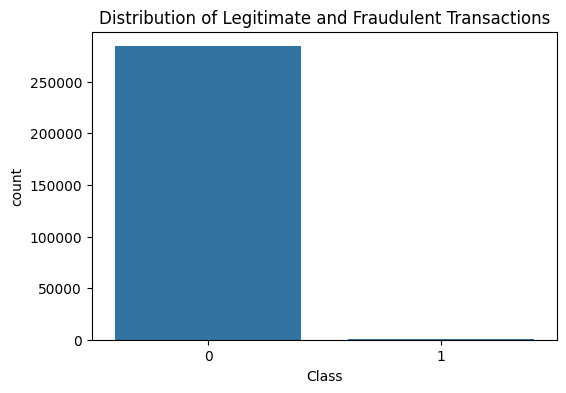

In [ ]:
# Distribution of legitimate and fraudulent transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=credit_data)
plt.title('Distribution of Legitimate and Fraudulent Transactions')
plt.show()


In [ ]:
# Separate data for analysis
legit = credit_data[credit_data.Class == 0]
fraud = credit_data[credit_data.Class == 1]

In [ ]:

# Display basic statistics
print(credit_data.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

In [ ]:
# Balancing the dataset using SMOTE
X = credit_data.drop(columns='Class', axis=1)
Y = credit_data['Class']

In [ ]:
smote = SMOTE(random_state=2)
X_resampled, Y_resampled = smote.fit_resample(X, Y)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, stratify=Y_resampled, random_state=2)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate the model
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    metrics = {
        "Training Accuracy": accuracy_score(Y_train, train_predictions),
        "Testing Accuracy": accuracy_score(Y_test, test_predictions),
        "Precision": precision_score(Y_test, test_predictions),
        "Recall": recall_score(Y_test, test_predictions),
        "F1 Score": f1_score(Y_test, test_predictions)
    }

    return metrics, test_predictions

metrics, test_predictions = evaluate_model(model, X_train, Y_train, X_test, Y_test)

In [ ]:
# Print metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Training Accuracy: 0.9801
Testing Accuracy: 0.9803
Precision: 0.9912
Recall: 0.9691
F1 Score: 0.9800


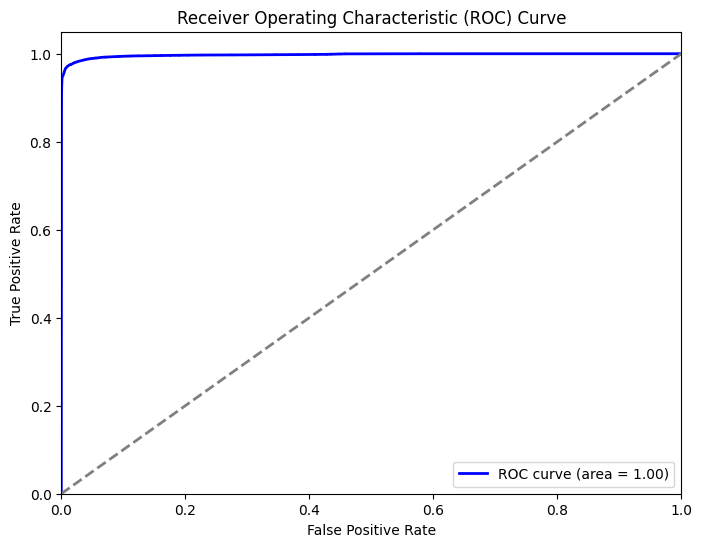

In [ ]:
# Plot ROC curve
def plot_roc_curve(model, X_test, Y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(model, X_test, Y_test)

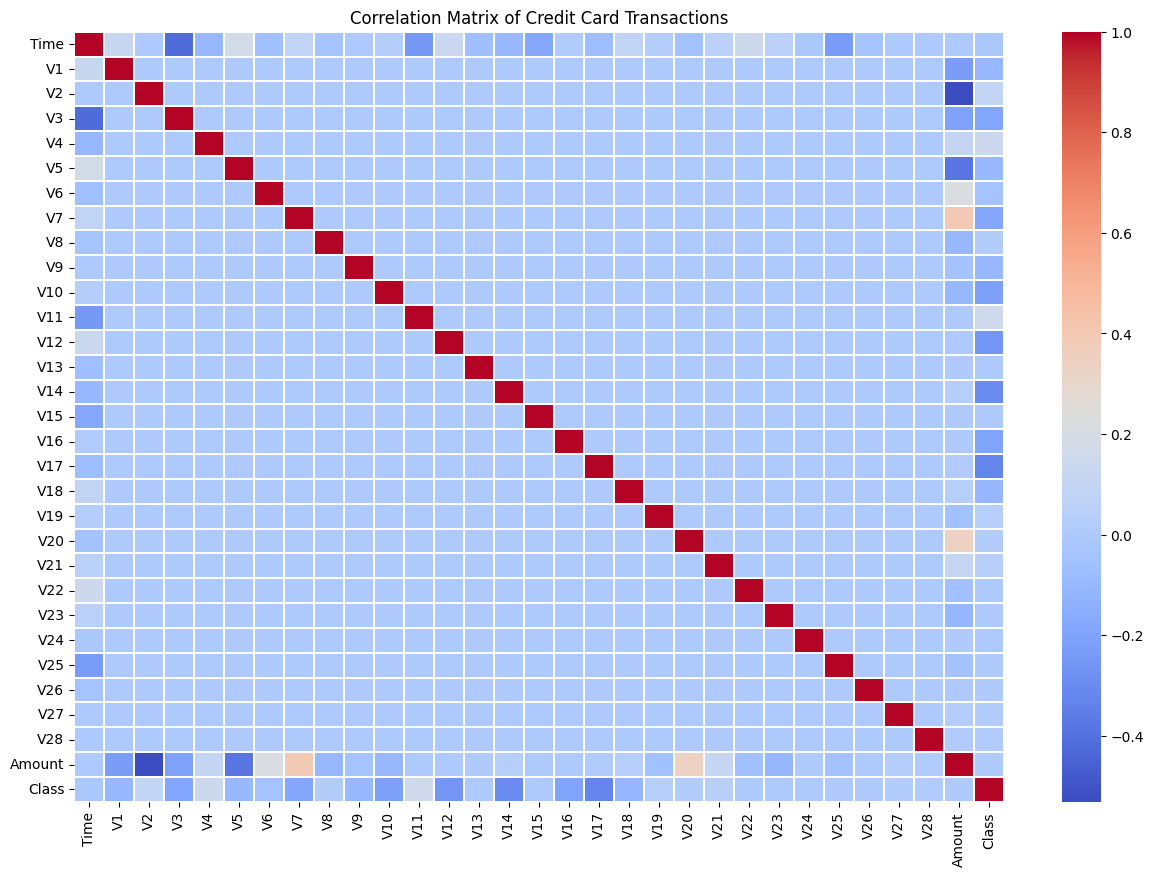

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = credit_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix of Credit Card Transactions')
plt.show()